### Step 1: Importing and Merging Data

In [396]:
# Supressing Warnings 
import warnings 
warnings.filterwarnings('ignore')

In [397]:
import pandas as pd 
import numpy as np 

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale


In [398]:
# Importing data 
df =  pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [399]:
df1 = df

### Step 2: Inspecting data

In [400]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [401]:
df1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [402]:
## Checking null % of each column 
df1.isnull().sum()/len(df1)

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

In [403]:
# Replacing Select with null as select has no information 
df1 = df1.replace('Select', np.nan)
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [404]:
# Checking null% 
df1.isnull().sum()/len(df1)


Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
How did you hear about X Education               0.784632
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

In [405]:
# Creating a function to remove null values above certain percentage 
def missing_values(df, percentage):

    columns = df.columns
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

    missing_drop = list(missing_value_df[missing_value_df.percent_missing>percentage].column_name)
    df = df.drop(missing_drop, axis=1)
    return df

In [406]:
# Droping columns with more than 25% null values 
df2 = missing_values(df1, 25)
df2.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [407]:
# Inspecting the new dataframe 
df2.isnull().sum()/len(df2)

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.003896
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 0.014827
Total Time Spent on Website                 0.000000
Page Views Per Visit                        0.014827
Last Activity                               0.011147
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

In [408]:
# Imputing data for columns having less null values % 
df2['TotalVisits'] = df2['TotalVisits'].fillna(df2.TotalVisits.mean())
df2['Page Views Per Visit'] = df2['Page Views Per Visit'].fillna(df2['Page Views Per Visit'].mean())


In [409]:
df2.isnull().sum()/len(df2)

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.003896
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 0.000000
Total Time Spent on Website                 0.000000
Page Views Per Visit                        0.000000
Last Activity                               0.011147
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

In [410]:
# Removing NaN last Activity & Lead Source Row 
df2 = df2.dropna(how='any', axis=0)
df2.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [411]:
# Remaining % of rows post removing null rows 
len(df2)*100/len(df)

98.51731601731602

In [412]:
def get_cols_count(df):
    d = {}
    for i in df.columns.tolist():
        d[i] = df[str(i)].nunique()
    return d 

In [413]:
get_cols_count(df2)

{'Prospect ID': 9103,
 'Lead Number': 9103,
 'Lead Origin': 4,
 'Lead Source': 21,
 'Do Not Email': 2,
 'Do Not Call': 2,
 'Converted': 2,
 'TotalVisits': 42,
 'Total Time Spent on Website': 1721,
 'Page Views Per Visit': 115,
 'Last Activity': 17,
 'Search': 2,
 'Magazine': 1,
 'Newspaper Article': 2,
 'X Education Forums': 2,
 'Newspaper': 2,
 'Digital Advertisement': 2,
 'Through Recommendations': 2,
 'Receive More Updates About Our Courses': 1,
 'Update me on Supply Chain Content': 1,
 'Get updates on DM Content': 1,
 'I agree to pay the amount through cheque': 1,
 'A free copy of Mastering The Interview': 2,
 'Last Notable Activity': 16}

#### We can drop few columns like "Magazine" where whole columns has just 1 value. Columns with no varying data are of no use to us. 

In [414]:
df2.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque' ],axis=1,inplace= True)

In [415]:
df2.columns.tolist()

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [416]:
get_cols_count(df2)

{'Prospect ID': 9103,
 'Lead Number': 9103,
 'Lead Origin': 4,
 'Lead Source': 21,
 'Do Not Email': 2,
 'Do Not Call': 2,
 'Converted': 2,
 'TotalVisits': 42,
 'Total Time Spent on Website': 1721,
 'Page Views Per Visit': 115,
 'Last Activity': 17,
 'Search': 2,
 'Newspaper Article': 2,
 'X Education Forums': 2,
 'Newspaper': 2,
 'Digital Advertisement': 2,
 'Through Recommendations': 2,
 'A free copy of Mastering The Interview': 2,
 'Last Notable Activity': 16}

In [417]:
df2.isnull().sum()/len(df2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

#### We've handled all the null values. We can now proceed with Data Preparation step

### Step 3: Data Preparation

#### Creating Dummy Variables

In [418]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'lead Origin'
lo = pd.get_dummies(df2['Lead Origin'], prefix='Lead Origin', drop_first=True)
#Adding the results to the master dataframe
df2 = pd.concat([df2,lo], axis=1)
# Dropping Lead Origin column
df2.drop(['Lead Origin'], axis=1, inplace=True)


In [419]:

# Creating dummy variables for the variable 'Lead Source'
ls = pd.get_dummies(df2['Lead Source'], prefix='Lead Source', drop_first=True)
#Adding the results to the master dataframe
df2 = pd.concat([df2,ls], axis=1)
# Dropping Lead Source column
df2.drop(['Lead Source'], axis=1, inplace=True)


In [420]:

# Creating dummy variables for the variable 'Last Notable Activity'
ln = pd.get_dummies(df2['Last Notable Activity'], prefix='Last Notable Activity', drop_first=True)
#Adding the results to the master dataframe
df2 = pd.concat([df2,ln], axis=1)
# Dropping Last Notable Activity column
df2.drop(['Last Notable Activity'], axis=1, inplace=True)



In [421]:

# Creating dummy variables for the variable 'Last Activity'
la = pd.get_dummies(df2['Last Activity'], prefix='Last Activity', drop_first=True)
#Adding the results to the master dataframe
df2 = pd.concat([df2,la], axis=1)
# Dropping Lead Source column
df2.drop(['Last Activity'], axis=1, inplace=True)



In [422]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df2[varlist] = df2[varlist].apply(binary_map)

In [423]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df2[['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']], drop_first=True)

# Adding the results to the master dataframe
df2 = pd.concat([df2, dummy1], axis=1)

In [424]:
len(df2.columns.tolist())

78

#### Post creating dummy variables we have 78 columns to deal with. Let's proceed with handling outliers

In [425]:
# Checking for outliers in the continuous variables
num_df2 = df2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [426]:
num_df2.describe(percentiles=[.10,.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.455994,483.773921,2.370128
std,4.851055,545.519186,2.157425
min,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,247.000000,2.000000
75%,5.000000,924.000000,3.000000
90%,7.000000,1375.000000,5.000000
95%,10.000000,1557.000000,6.000000


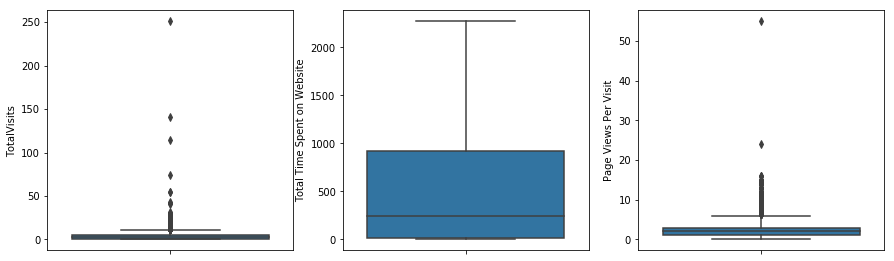

In [427]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.boxplot(y='TotalVisits', data=num_df2)
plt.subplot(3,3,2)
sns.boxplot(y='Total Time Spent on Website', data=num_df2)
plt.subplot(3,3,3)
sns.boxplot(y='Page Views Per Visit', data=num_df2)

#### We will be keeping only those rows which are inbetween 5-95 percentile

In [428]:
df2 = df2[(df2.TotalVisits < np.percentile(df2.TotalVisits,95)) & (df2.TotalVisits > np.percentile(df2.TotalVisits,5))]
df2 = df2[(df2['Total Time Spent on Website'] < np.percentile(df2['Total Time Spent on Website'],95)) & (df2['Total Time Spent on Website'] > np.percentile(df2['Total Time Spent on Website'],5))]
df2 = df2[(df2['Page Views Per Visit'] < np.percentile(df2['Page Views Per Visit'],95)) & (df2['Page Views Per Visit'] > np.percentile(df2['Page Views Per Visit'],5))]

len(df2)

4794

#### Post Outlier treatment we are left with only 52% rows as compared to inital dataset

In [429]:
# Checking for outliers in the continuous variables
num_df2_1 = df2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_df2_1.describe(percentiles=[.10,.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,4794.000000,4794.000000,4794.000000
mean,3.777457,606.958490,2.845303
std,1.717187,481.823728,1.045444
min,2.000000,34.000000,1.140000
10%,2.000000,94.000000,2.000000
25%,2.000000,192.000000,2.000000
50%,3.000000,400.000000,2.670000
75%,5.000000,1053.750000,4.000000
90%,6.000000,1353.000000,4.000000
95%,8.000000,1464.350000,5.000000


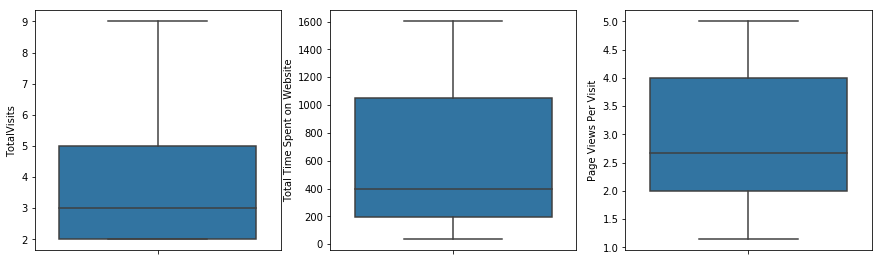

In [430]:
# Visualisation 
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.boxplot(y='TotalVisits', data=num_df2_1)
plt.subplot(3,3,2)
sns.boxplot(y='Total Time Spent on Website', data=num_df2_1)
plt.subplot(3,3,3)
sns.boxplot(y='Page Views Per Visit', data=num_df2_1)

#### Looks good 

### Step 4: Test-Train Split

In [431]:
from sklearn.model_selection import train_test_split  

In [432]:
# Putting feature variable to X
X = df2.drop(['Prospect ID','Lead Number', 'Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Visited Booth in Tradeshow,Do Not Email,Do Not Call,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
1,0,0,5.0,674,2.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,2.0,71,2.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,4.0,58,4.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,8.0,1343,2.67,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [433]:
# Putting response variable to y
y = df2['Converted']

y.head()

1     0
2     1
8     0
9     0
11    1
Name: Converted, dtype: int64

In [434]:
# Spliting the data into test and train set 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)



### Step 5: Scaling Features 

In [435]:
from sklearn.preprocessing import StandardScaler 

In [436]:
scaler=StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Visited Booth in Tradeshow,Do Not Email,Do Not Call,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
6989,0,0,3.074267,0.685222,0.146531,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1194,1,0,-1.029541,-0.452460,-0.811117,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
8642,0,0,0.142976,-0.389836,1.104179,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2440,0,0,-1.029541,0.914846,-0.811117,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3049,0,0,0.142976,-0.705047,-0.811117,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [437]:
### Checking the Conversion Rate
conversion = (sum(df2['Converted'])/len(df2['Converted'].index))*100
conversion

36.816854401335

Currently, we have a conversion rate of ~36.8% 

### Step 6: Correlation Matrix

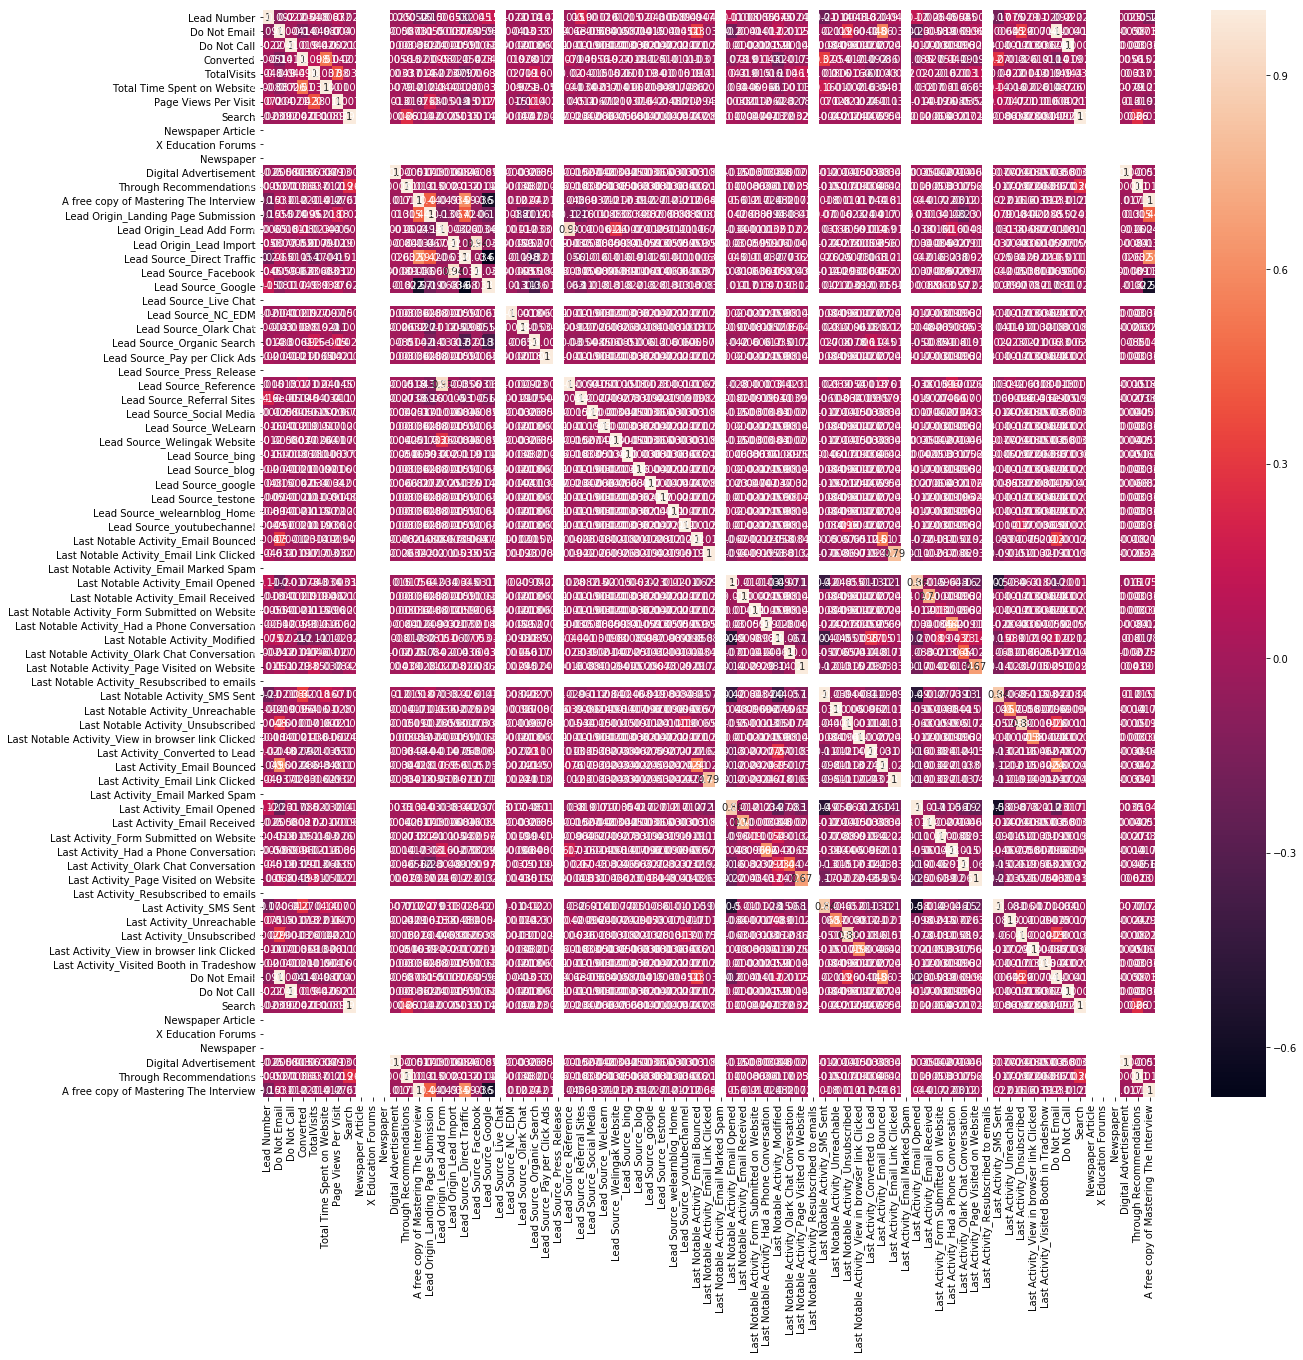

In [438]:
# Let's check for correlation between variables and check for multicollinearity 
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot=True)
plt.show()

#### Currently, it's quite difficult to interpret the correlation matrix. Let's move ahead with the Model Building and we will use RFE to choose Top features 

### Step 7: Model Building

In [439]:
import statsmodels.api as sm

In [440]:
# Logistic Model Regression 
logm1 =  sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3355
Model:                            GLM   Df Residuals:                     3300
Model Family:                Binomial   Df Model:                           54
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        20:14:20   Pearson chi2:                 3.30e+18
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               1.693e+16   9.51e+07   1.78e+08      0.000    1.69e+16    1.69e+16
Do Not Email                                       -5.749e+14   2.83e+06  -2.03e+08      0.000   -5.75e+14   -5.75e+14
Do Not Call                                         8.072e+14   3.37e+07   2.39e+07      0.000    8.07e+14    8.07e+14
TotalVisits                                         1.621e+14   1.34e+06   1.21e+08      0.000    1.62e+14    1.62e+14
Total Time Spent on Website                         9.495e+14   1.19e+06      8e+08      0.000    9.49e+14    9.49e+14
Page Views Per Visit                               -4.576e+13   1.36e+06  -3.37e+07      0.000   -4.58e+13   -4.58e+13
Search                                              1.079e+15   2.13e+07   5.07e+07      0.000    1.08e+15    1.08e+15
Newspaper Article                                     30.9153   3.87e-07   7.99e+07      0.000      30.915      30.915
X Education Forums                                    47.2158   2.33e-07   2.02e+08      0.000      47.216      47.216
Newspaper                                           -128.5739   4.74e-07  -2.71e+08      0.000    -128.574    -128.574
Digital Advertisement                              -6.462e+14   2.38e+07  -2.71e+07      0.000   -6.46e+14   -6.46e+14
Through Recommendations                             -3.12e+14   2.61e+07   -1.2e+07      0.000   -3.12e+14   -3.12e+14
A free copy of Mastering The Interview             -1.122e+14   1.64e+06  -6.82e+07      0.000   -1.12e+14   -1.12e+14
Lead Origin_Landing Page Submission                -1.032e+14   3.33e+06  -3.09e+07      0.000   -1.03e+14   -1.03e+14
Lead Origin_Lead Add Form                           3.006e+15   6.81e+07   4.42e+07      0.000    3.01e+15    3.01e+15
Lead Origin_Lead Import                             8.917e+14   7.52e+07   1.19e+07      0.000    8.92e+14    8.92e+14
Lead Source_Direct Traffic                         -5.901e+15   9.58e+07  -6.16e+07      0.000    -5.9e+15    -5.9e+15
Lead Source_Facebook                               -1.026e+16   1.17e+08  -8.77e+07      0.000   -1.03e+16   -1.03e+16
Lead Source_Google                                 -6.011e+15   9.58e+07  -6.27e+07      0.000   -6.01e+15   -6.01e+15
Lead Source_Live Chat                                -92.3443    8.1e-07  -1.14e+08      0.000     -92.344     -92.344
Lead Source_NC_EDM                                  1.166e+16   1.17e+08   9.96e+07      0.000    1.17e+16    1.17e+16
Lead Source_Olark Chat                              -5.85e+15   9.53e+07  -6.14e+07      0.000   -5.85e+15   -5.85e+15
Lead Source_Organic Search                         -5.977e+15   9.58e+07  -6.24e+07      0.000   -5.98e+15   -5.98e+15
Lead Source_Pay per Click Ads                        -59.5552   1.44

### Step 8: Feature Selection Using RFE

In [441]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()


In [442]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15) # Running RFE for 15 features 
rfe = rfe.fit(X_train, y_train)

In [443]:
rfe.support_

array([ True, False, False,  True, False,  True, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False,  True,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False])

In [444]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 36),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 44),
 ('Search', True, 1),
 ('Newspaper Article', False, 50),
 ('X Education Forums', False, 48),
 ('Newspaper', False, 57),
 ('Digital Advertisement', False, 43),
 ('Through Recommendations', False, 27),
 ('A free copy of Mastering The Interview', False, 46),
 ('Lead Origin_Landing Page Submission', False, 39),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 45),
 ('Lead Source_Live Chat', False, 52),
 ('Lead Source_NC_EDM', False, 4),
 ('Lead Source_Olark Chat', False, 28),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Pay per Click Ads', False, 58),
 ('Lead Source_Press_Release', False, 59),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 18

In [445]:
col =  X_train.columns[rfe.support_]

In [446]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Received',
       'Last Notabl

#### Assessing the model using stats model

In [447]:
X_train_sm =  sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3355
Model:                            GLM   Df Residuals:                     3340
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        20:14:25   Pearson chi2:                 1.35e+16
No. Iterations:                   100   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5367      0.081      6.662      0.000       0.379       0.695
Do Not Email                                   1.446e+07      0.145   9.95e+07      0.000    1.45e+07    1.45e+07
Do Not Email                                  -7.477e+06      0.119   -6.3e+07      0.000   -7.48e+06   -7.48e+06
Total Time Spent on Website                       1.0822      0.047     22.993      0.000       0.990       1.174
Search                                         1.813e+08   1.94e+07      9.361      0.000    1.43e+08    2.19e+08
Search                                         2.134e+08   1.94e+07     11.017      0.000    1.75e+08    2.51e+08
Lead Origin_Lead Add Form                      4.504e+15   3.87e+07   1.16e+08      0.000     4.5e+15     4.5e+15
Lead Source_Facebook                          -4.504e+15      3e+07   -1.5e+08      0.000    -4.5e+15    -4.5e+15
Lead Source_Reference                         -3.709e+15    4.2e+07  -8.83e+07      0.000   -3.71e+15   -3.71e+15
Last Notable Activity_Email Link Clicked         -0.9534      0.509     -1.871      0.061      -1.952       0.045
Last Notable Activity_Email Opened               -1.5096      0.110    -13.683      0.000      -1.726      -1.293
Last Notable Activity_Modified                   -1.4145      0.119    -11.871      0.000      -1.648      -1.181
Last Notable Activity_Olark Chat Conversation    -2.6317      0.455     -5.778      0.000      -3.524      -1.739
Last Notable Activity_Unreachable                -0.1997      0.613     -0.326      0.745      -1.401       1.002
Last Activity_Converted to Lead                  -1.2154      0.323     -3.759      0.000      -1.849      -0.582
Last Activity_Had a Phone Conversation            0.1198      0.700      0.171      0.864      -1.252       1.491
Last Activity_Page Visited on Website            -1.4681      0.189     -7.776      0.000      -1.838      -1.098
Do Not Email                                  -3.585e+06      0.052  -6.89e+07      0.000   -3.59e+06   -3.59e+06
Do Not Email                                  -3.394e+06      0.052  -6.53e+07      0.000   -3.39e+06   -3.39e+06
=================================================================================================================
"""

#### Dropping Last Activity_Had a Phone Conversation column due to high P-value

In [448]:
col.tolist()

['Do Not Email',
 'Total Time Spent on Website',
 'Search',
 'Lead Origin_Lead Add Form',
 'Lead Source_Facebook',
 'Lead Source_Reference',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_Unreachable',
 'Last Activity_Converted to Lead',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Page Visited on Website',
 'Do Not Email']

In [449]:
# Removing Last Activity_Had a phone conversation and re-running the model
col3 = [
 'Total Time Spent on Website',
 'Search',
 'Lead Origin_Lead Add Form',
 'Lead Source_Facebook',
 'Lead Source_Reference',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_Unreachable',
 'Last Activity_Converted to Lead',
 'Last Activity_Page Visited on Website',
 'Do Not Email']

In [450]:
X_train_sm = sm.add_constant(X_train[col3])
logm3 =  sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3355
Model:                            GLM   Df Residuals:                     3341
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1569.6
Date:                Sun, 03 Mar 2019   Deviance:                       3139.3
Time:                        20:14:25   Pearson chi2:                 3.41e+03
No. Iterations:                    21   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5360      0.081      6.581      0.000       0.376       0.696
Total Time Spent on Website                       1.1351      0.047     24.385      0.000       1.044       1.226
Search                                            0.8142      0.683      1.192      0.233      -0.524       2.152
Search                                            0.8142      0.683      1.192      0.233      -0.524       2.152
Lead Origin_Lead Add Form                        23.0158   2.64e+04      0.001      0.999   -5.17e+04    5.17e+04
Lead Source_Facebook                            -21.1816   1.96e+04     -0.001      0.999   -3.84e+04    3.84e+04
Lead Source_Reference                           -20.3801   2.64e+04     -0.001      0.999   -5.17e+04    5.17e+04
Last Notable Activity_Email Link Clicked         -1.9143      0.397     -4.817      0.000      -2.693      -1.135
Last Notable Activity_Email Opened               -1.4730      0.110    -13.344      0.000      -1.689      -1.257
Last Notable Activity_Modified                   -1.5921      0.119    -13.334      0.000      -1.826      -1.358
Last Notable Activity_Olark Chat Conversation    -2.1698      0.531     -4.090      0.000      -3.210      -1.130
Last Notable Activity_Unreachable                 1.2075      0.687      1.757      0.079      -0.140       2.555
Last Activity_Converted to Lead                  -1.1784      0.326     -3.612      0.000      -1.818      -0.539
Last Activity_Page Visited on Website            -1.2850      0.193     -6.652      0.000      -1.664      -0.906
Do Not Email                                     -0.8295      0.106     -7.826      0.000      -1.037      -0.622
Do Not Email                                     -0.8295      0.106     -7.826      0.000      -1.037      -0.622
=================================================================================================================
"""

In [451]:
# Dropping Reference and re-running the model
col4 =  [
 'Total Time Spent on Website',
 'Search',
 'Lead Origin_Lead Add Form',
 'Lead Source_Facebook',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_Unreachable',
 'Last Activity_Converted to Lead',
 'Last Activity_Page Visited on Website',
 'Do Not Email']

In [452]:
X_train_sm = sm.add_constant(X_train[col4])
logm4 =  sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3355
Model:                            GLM   Df Residuals:                     3342
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1570.0
Date:                Sun, 03 Mar 2019   Deviance:                       3139.9
Time:                        20:14:26   Pearson chi2:                 3.41e+03
No. Iterations:                    20   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5359      0.081      6.580      0.000       0.376       0.696
Total Time Spent on Website                       1.1355      0.047     24.392      0.000       1.044       1.227
Search                                            0.8139      0.683      1.192      0.233      -0.525       2.153
Search                                            0.8139      0.683      1.192      0.233      -0.525       2.153
Lead Origin_Lead Add Form                         2.8230      0.789      3.579      0.000       1.277       4.369
Lead Source_Facebook                            -20.1813   1.19e+04     -0.002      0.999   -2.33e+04    2.33e+04
Last Notable Activity_Email Link Clicked         -1.9144      0.397     -4.816      0.000      -2.693      -1.135
Last Notable Activity_Email Opened               -1.4735      0.110    -13.346      0.000      -1.690      -1.257
Last Notable Activity_Modified                   -1.5920      0.119    -13.335      0.000      -1.826      -1.358
Last Notable Activity_Olark Chat Conversation    -2.1742      0.532     -4.088      0.000      -3.217      -1.132
Last Notable Activity_Unreachable                 1.2073      0.688      1.756      0.079      -0.140       2.555
Last Activity_Converted to Lead                  -1.1787      0.326     -3.613      0.000      -1.818      -0.539
Last Activity_Page Visited on Website            -1.2816      0.193     -6.648      0.000      -1.659      -0.904
Do Not Email                                     -0.8296      0.106     -7.827      0.000      -1.037      -0.622
Do Not Email                                     -0.8296      0.106     -7.827      0.000      -1.037      -0.622
=================================================================================================================
"""

In [453]:
# Dropping Facebook and re-running the model 
col5 =  [
 'Total Time Spent on Website',
 'Search',
 'Lead Origin_Lead Add Form',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_Unreachable',
 'Last Activity_Converted to Lead',
 'Last Activity_Page Visited on Website',
 'Do Not Email']

In [454]:
X_train_sm = sm.add_constant(X_train[col5])
logm5 =  sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res5 = logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3355
Model:                            GLM   Df Residuals:                     3343
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1571.1
Date:                Sun, 03 Mar 2019   Deviance:                       3142.2
Time:                        20:14:26   Pearson chi2:                 3.41e+03
No. Iterations:                     5   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5327      0.081      6.546      0.000       0.373       0.692
Total Time Spent on Website                       1.1367      0.047     24.421      0.000       1.046       1.228
Search                                            0.8141      0.683      1.192      0.233      -0.525       2.153
Search                                            0.8141      0.683      1.192      0.233      -0.525       2.153
Lead Origin_Lead Add Form                         2.8258      0.789      3.582      0.000       1.280       4.372
Last Notable Activity_Email Link Clicked         -1.9115      0.398     -4.808      0.000      -2.691      -1.132
Last Notable Activity_Email Opened               -1.4706      0.110    -13.325      0.000      -1.687      -1.254
Last Notable Activity_Modified                   -1.5930      0.119    -13.354      0.000      -1.827      -1.359
Last Notable Activity_Olark Chat Conversation    -2.1715      0.532     -4.082      0.000      -3.214      -1.129
Last Notable Activity_Unreachable                 1.2112      0.688      1.761      0.078      -0.136       2.559
Last Activity_Converted to Lead                  -1.1752      0.326     -3.602      0.000      -1.815      -0.536
Last Activity_Page Visited on Website            -1.2784      0.193     -6.631      0.000      -1.656      -0.901
Do Not Email                                     -0.8293      0.106     -7.828      0.000      -1.037      -0.622
Do Not Email                                     -0.8293      0.106     -7.828      0.000      -1.037      -0.622
=================================================================================================================
"""

In [455]:
# Dropping Search and re-running the model 
col6 =  [
 'Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_Unreachable',
 'Last Activity_Converted to Lead',
 'Last Activity_Page Visited on Website',
 'Do Not Email']

In [456]:
X_train_sm = sm.add_constant(X_train[col6])
logm6 = sm.GLM(y_train, X_train_sm,family=sm.families.Binomial())
res6 = logm6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3355
Model:                            GLM   Df Residuals:                     3344
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1571.9
Date:                Sun, 03 Mar 2019   Deviance:                       3143.8
Time:                        20:14:26   Pearson chi2:                 3.41e+03
No. Iterations:                     5   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5336      0.081      6.557      0.000       0.374       0.693
Total Time Spent on Website                       1.1366      0.047     24.418      0.000       1.045       1.228
Lead Origin_Lead Add Form                         2.8244      0.789      3.580      0.000       1.278       4.371
Last Notable Activity_Email Link Clicked         -1.9123      0.398     -4.810      0.000      -2.692      -1.133
Last Notable Activity_Email Opened               -1.4681      0.110    -13.308      0.000      -1.684      -1.252
Last Notable Activity_Modified                   -1.5948      0.119    -13.372      0.000      -1.829      -1.361
Last Notable Activity_Olark Chat Conversation    -2.1723      0.532     -4.084      0.000      -3.215      -1.130
Last Notable Activity_Unreachable                 1.2102      0.688      1.760      0.078      -0.137       2.558
Last Activity_Converted to Lead                  -1.1742      0.326     -3.599      0.000      -1.814      -0.535
Last Activity_Page Visited on Website            -1.2669      0.192     -6.598      0.000      -1.643      -0.891
Do Not Email                                     -0.8298      0.106     -7.833      0.000      -1.037      -0.622
Do Not Email                                     -0.8298      0.106     -7.833      0.000      -1.037      -0.622
=================================================================================================================
"""

In [457]:
# Dropping Unreachable and re-running the model 
col7 =  [
 'Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Activity_Converted to Lead',
 'Last Activity_Page Visited on Website',
 'Do Not Email']

In [458]:
X_train_sm = sm.add_constant(X_train[col7])
logm7 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res7 = logm7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3355
Model:                            GLM   Df Residuals:                     3345
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1573.7
Date:                Sun, 03 Mar 2019   Deviance:                       3147.4
Time:                        20:14:26   Pearson chi2:                 3.40e+03
No. Iterations:                     5   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5541      0.081      6.866      0.000       0.396       0.712
Total Time Spent on Website                       1.1349      0.047     24.404      0.000       1.044       1.226
Lead Origin_Lead Add Form                         2.8287      0.788      3.589      0.000       1.284       4.373
Last Notable Activity_Email Link Clicked         -1.9323      0.397     -4.863      0.000      -2.711      -1.154
Last Notable Activity_Email Opened               -1.4882      0.110    -13.549      0.000      -1.704      -1.273
Last Notable Activity_Modified                   -1.6129      0.119    -13.564      0.000      -1.846      -1.380
Last Notable Activity_Olark Chat Conversation    -2.1923      0.532     -4.123      0.000      -3.235      -1.150
Last Activity_Converted to Lead                  -1.1756      0.326     -3.604      0.000      -1.815      -0.536
Last Activity_Page Visited on Website            -1.2795      0.192     -6.664      0.000      -1.656      -0.903
Do Not Email                                     -0.8368      0.106     -7.899      0.000      -1.044      -0.629
Do Not Email                                     -0.8368      0.106     -7.899      0.000      -1.044      -0.629
=================================================================================================================
"""

#### All features P values are less than 0.05. We can proceed from here to prediction 

In [459]:
# Getting the prediction values
y_train_pred =  res7.predict(X_train_sm)
y_train_pred[:10]

6989    0.460969
1194    0.037472
8642    0.182243
2440    0.830955
3049    0.438799
2179    0.110571
107     0.109267
8734    0.106447
121     0.153394
1256    0.101158
dtype: float64

In [460]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number']  =  df2['Lead Number']
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number
6989,1,0.460969,595988
1194,0,0.037472,647300
8642,1,0.182243,583760
2440,1,0.830955,636241
3049,1,0.438799,630706


#### Checking VIFs

In [461]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 


In [462]:
# Creating a dataframe having feature and its respective VIF value
vif=  pd.DataFrame()
vif['Features'] =  X_train[col7].columns
vif['VIF'] = [variance_inflation_factor(X_train[col7].values,i) for i in range(X_train[col7].shape[1])]
vif['VIF']  = round(vif['VIF'], 2)
vif  =vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
8,Do Not Email,inf
9,Do Not Email,inf
4,Last Notable Activity_Modified,1.310000
6,Last Activity_Converted to Lead,1.140000
7,Last Activity_Page Visited on Website,1.100000
0,Total Time Spent on Website,1.010000
1,Lead Origin_Lead Add Form,1.010000
2,Last Notable Activity_Email Link Clicked,1.000000
3,Last Notable Activity_Email Opened,1.000000
5,Last Notable Activity_Olark Chat Conversation,1.000000


Let's drop Do Not Email columns

In [463]:
# Dropping Do Not Email Columns and re-running the model
col8 = ['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Activity_Converted to Lead',
 'Last Activity_Page Visited on Website']

In [464]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col8])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res8 = logm8.fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3355
Model:                            GLM   Df Residuals:                     3346
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1612.1
Date:                Sun, 03 Mar 2019   Deviance:                       3224.3
Time:                        20:14:27   Pearson chi2:                 3.42e+03
No. Iterations:                     5   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3543      0.076      4.686      0.000       0.206       0.502
Total Time Spent on Website                       1.1423      0.046     24.868      0.000       1.052       1.232
Lead Origin_Lead Add Form                         2.9470      0.786      3.748      0.000       1.406       4.488
Last Notable Activity_Email Link Clicked         -1.7672      0.395     -4.470      0.000      -2.542      -0.992
Last Notable Activity_Email Opened               -1.2920      0.106    -12.179      0.000      -1.500      -1.084
Last Notable Activity_Modified                   -1.5756      0.116    -13.562      0.000      -1.803      -1.348
Last Notable Activity_Olark Chat Conversation    -2.0187      0.530     -3.809      0.000      -3.057      -0.980
Last Activity_Converted to Lead                  -1.0176      0.326     -3.123      0.002      -1.656      -0.379
Last Activity_Page Visited on Website            -1.2424      0.188     -6.610      0.000      -1.611      -0.874
=================================================================================================================
"""

In [465]:
y_train_pred = res8.predict(X_train_sm).values.reshape(-1)

In [466]:
y_train_pred[:10]

array([0.46132187, 0.14955329, 0.1588815 , 0.80207326, 0.38910616,
       0.10948549, 0.09385328, 0.10537037, 0.15227458, 0.10009617])

In [467]:
y_train_pred_final['Converted_prob'] = y_train_pred

In [468]:
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number
6989,1,0.461322,595988
1194,0,0.149553,647300
8642,1,0.158882,583760
2440,1,0.802073,636241
3049,1,0.389106,630706


#### Let's check VIFs again

In [469]:
# Creating a dataframe having feature and its respective VIF value
vif=  pd.DataFrame()
vif['Features'] =  X_train[col8].columns
vif['VIF'] = [variance_inflation_factor(X_train[col8].values,i) for i in range(X_train[col8].shape[1])]
vif['VIF']  = round(vif['VIF'], 2)
vif  =vif.sort_values(by = 'VIF', ascending= False)
vif

,Features,VIF
4,Last Notable Activity_Modified,1.23
6,Last Activity_Converted to Lead,1.13
7,Last Activity_Page Visited on Website,1.09
0,Total Time Spent on Website,1.01
1,Lead Origin_Lead Add Form,1.01
2,Last Notable Activity_Email Link Clicked,1.00
3,Last Notable Activity_Email Opened,1.00
5,Last Notable Activity_Olark Chat Conversation,1.00


#### All VIF values are less than 2 so, we have handled all cases of multicollinearity

In [470]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted
6989,1,0.461322,595988,0
1194,0,0.149553,647300,0
8642,1,0.158882,583760,0
2440,1,0.802073,636241,1
3049,1,0.389106,630706,0


In [471]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7690014903129657


In [472]:
## Checking conversion rate 
cr =  y_train_pred_final.predicted.sum()/len(y_train_pred_final)
cr

0.30342771982116246

#### We have got the accuracy of 76.9% whereas we are targeting a conversion rate of 80% 

### Step 9: Plotting the ROC Curve

In [473]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [474]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

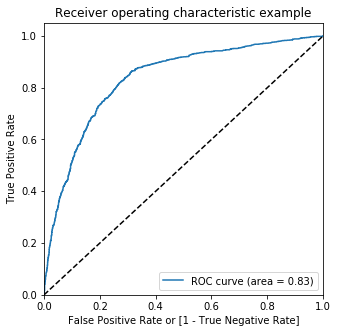

In [475]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### The ROC curve is pretty far from the 45 Degree line. It shows we have an accurate model. Now we need to look for optimal cutoff probability

In [476]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6989,1,0.461322,595988,0,1,1,1,1,1,0,0,0,0,0
1194,0,0.149553,647300,0,1,1,0,0,0,0,0,0,0,0
8642,1,0.158882,583760,0,1,1,0,0,0,0,0,0,0,0
2440,1,0.802073,636241,1,1,1,1,1,1,1,1,1,1,0
3049,1,0.389106,630706,0,1,1,1,1,0,0,0,0,0,0


In [477]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.362742  1.000000  0.000000
0.1   0.1  0.495082  0.969597  0.224977
0.2   0.2  0.713562  0.891537  0.612254
0.3   0.3  0.756483  0.833196  0.712816
0.4   0.4  0.776453  0.721446  0.807764
0.5   0.5  0.769001  0.599836  0.865295
0.6   0.6  0.755887  0.493837  0.905051
0.7   0.7  0.737705  0.376335  0.943405
0.8   0.8  0.702235  0.224322  0.974275
0.9   0.9  0.663487  0.085456  0.992516


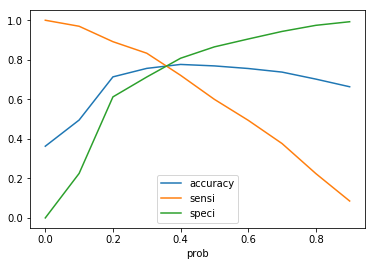

In [478]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Since, we want to optimise our model for precision to be 80% we will be setting up higher cutoff percentage

In [479]:
# Choosing a cut off of 0.75 and calculating final predicted values 
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.75 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
6989,1,0.461322,595988,0,1,1,1,1,1,0,0,0,0,0,0
1194,0,0.149553,647300,0,1,1,0,0,0,0,0,0,0,0,0
8642,1,0.158882,583760,0,1,1,0,0,0,0,0,0,0,0,0
2440,1,0.802073,636241,1,1,1,1,1,1,1,1,1,1,0,1
3049,1,0.389106,630706,0,1,1,1,1,0,0,0,0,0,0,0


In [480]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7192250372578242

In [481]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2053,   85],
       [ 857,  360]], dtype=int64)

In [482]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [483]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.29580936729663104

In [484]:
# Let us calculate specificity
TN / float(TN+FP)

0.960243217960711

In [485]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.039756782039289056


In [486]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8089887640449438


In [487]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7054982817869416


### Precision & Recall

#### Precision

TP / (TP+FP)

In [488]:
TP/float(TP+FP)

0.8089887640449438

#### Recall

TP / TP+FN

In [489]:
TP/float(TP+FN)

0.29580936729663104

#### Precision and Recall Tradeoff


In [490]:
from sklearn.metrics import precision_recall_curve

In [491]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

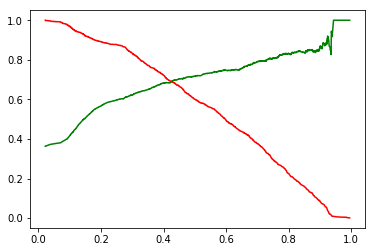

In [492]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### As our precision target was above 80% we chose threshold at 0.75 as taken above

### Step 11: Making Predictions on Test Set 

In [493]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [494]:
X_test = X_test[col8]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Activity_Converted to Lead,Last Activity_Page Visited on Website
8708,-0.577710,0,0,0,1,0,0,0
675,-0.502560,0,0,1,0,0,0,0
7818,1.422106,0,0,0,0,0,0,0
6054,0.871009,0,0,1,0,0,0,0
7309,-1.178907,0,0,0,1,0,1,0


In [495]:
X_test_sm = sm.add_constant(X_test)

In [496]:
y_test_pred = res8.predict(X_test_sm)
y_test_pred[:10]

8708    0.132253
675     0.180672
7818    0.878546
6054    0.514296
7309    0.026976
1452    0.167977
1946    0.566274
2337    0.915238
7564    0.780018
5139    0.117709
dtype: float64

In [497]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred, columns = ['Converted_prob'])
y_pred_1.head()

,Converted_prob
8708,0.132253
675,0.180672
7818,0.878546
6054,0.514296
7309,0.026976


In [498]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [499]:
y_test_final = pd.concat([y_test_df, y_pred_1], axis=1)
y_test_final.head()

,Converted,Converted_prob
8708,0,0.132253
675,1,0.180672
7818,1,0.878546
6054,1,0.514296
7309,0,0.026976


In [500]:
y_test_final['Lead Number'] = df2['Lead Number']

In [501]:
y_test_final.head()

,Converted,Converted_prob,Lead Number
8708,0,0.132253,583407
675,1,0.180672,653581
7818,1,0.878546,589845
6054,1,0.514296,603370
7309,0,0.026976,593359


In [502]:
y_pred_final =  y_test_final

In [503]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.75 else 0)

In [504]:
y_pred_final.head()

,Converted,Converted_prob,Lead Number,final_predicted
8708,0,0.132253,583407,0
675,1,0.180672,653581,0
7818,1,0.878546,589845,1
6054,1,0.514296,603370,0
7309,0,0.026976,593359,0


In [505]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7157748436414176

In [506]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[851,  40],
       [369, 179]], dtype=int64)

In [507]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [508]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.3266423357664234

In [509]:
# Let us calculate specificity
TN / float(TN+FP)

0.9551066217732884

In [510]:
# Precision
TP/float(TP+FP)

0.817351598173516

In [511]:
# Recall 
TP/float(TP+FN)

0.3266423357664234

### On Test set, we got a precision of 81.7% which is at par with the Business requirement of 80% 

In [512]:
y_pred_final.head()

,Converted,Converted_prob,Lead Number,final_predicted
8708,0,0.132253,583407,0
675,1,0.180672,653581,0
7818,1,0.878546,589845,1
6054,1,0.514296,603370,0
7309,0,0.026976,593359,0


In [513]:
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
6989,1,0.461322,595988,0,1,1,1,1,1,0,0,0,0,0,0
1194,0,0.149553,647300,0,1,1,0,0,0,0,0,0,0,0,0
8642,1,0.158882,583760,0,1,1,0,0,0,0,0,0,0,0,0
2440,1,0.802073,636241,1,1,1,1,1,1,1,1,1,1,0,1
3049,1,0.389106,630706,0,1,1,1,1,0,0,0,0,0,0,0


### Combining test & train dataset to get lead score

In [514]:
comp1 = y_train_pred_final[['Converted', 'Converted_prob', 'Lead Number', 'final_predicted']]
comp2 = y_pred_final
# Combining comp1 and comp2 to create a final dataframe 
final = pd.concat([comp1, comp2], axis=0)
final.head()

,Converted,Converted_prob,Lead Number,final_predicted
6989,1,0.461322,595988,0
1194,0,0.149553,647300,0
8642,1,0.158882,583760,0
2440,1,0.802073,636241,1
3049,1,0.389106,630706,0


In [515]:
# Creating lead_score column by multiplying converted_prob with 100
final['lead_score'] = 100*final['Converted_prob']

In [516]:
final.head()

,Converted,Converted_prob,Lead Number,final_predicted,lead_score
6989,1,0.461322,595988,0,46.132187
1194,0,0.149553,647300,0,14.955329
8642,1,0.158882,583760,0,15.888150
2440,1,0.802073,636241,1,80.207326
3049,1,0.389106,630706,0,38.910616


In [517]:
lead_score = final[['Lead Number', 'lead_score']].sort_values(by=['lead_score'], ascending=False)
lead_score.head()

,Lead Number,lead_score
2011,640191,99.502178
2594,634647,99.106425
6028,603581,98.675001
6944,596412,98.650437
2158,639099,98.452800


#### Now, we have lead number wise leads score in lead_score dataframe.

In [518]:
df2_final = pd.concat([df2, lead_score], axis=1)
df2_final.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,...,Do Not Call,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Number,lead_score
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.50,0,0,...,0,0,0,0,0,0,0,0,660728,31.643067
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.00,0,0,...,0,0,0,0,0,0,0,1,660727,78.171340
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,0,0,0,2.0,71,2.00,0,0,...,0,0,0,0,0,0,0,1,660624,9.902734
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,0,0,0,4.0,58,4.00,0,0,...,0,0,0,0,0,0,0,0,660616,9.629579
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,660570,0,0,1,8.0,1343,2.67,0,0,...,0,0,0,0,0,0,0,1,660570,70.570707


In [519]:
# Creating a dataframe with features we used for modeling 
df3 = df2[col8]
df3_final = pd.concat([df3, lead_score], axis=1)
df3_final.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Activity_Converted to Lead,Last Activity_Page Visited on Website,Lead Number,lead_score
1,674,0,0,1,0,0,0,0,660728,31.643067
2,1532,0,0,1,0,0,0,0,660727,78.171340
8,71,0,0,1,0,0,0,0,660624,9.902734
9,58,0,0,1,0,0,0,0,660616,9.629579
11,1343,0,0,0,0,0,0,1,660570,70.570707


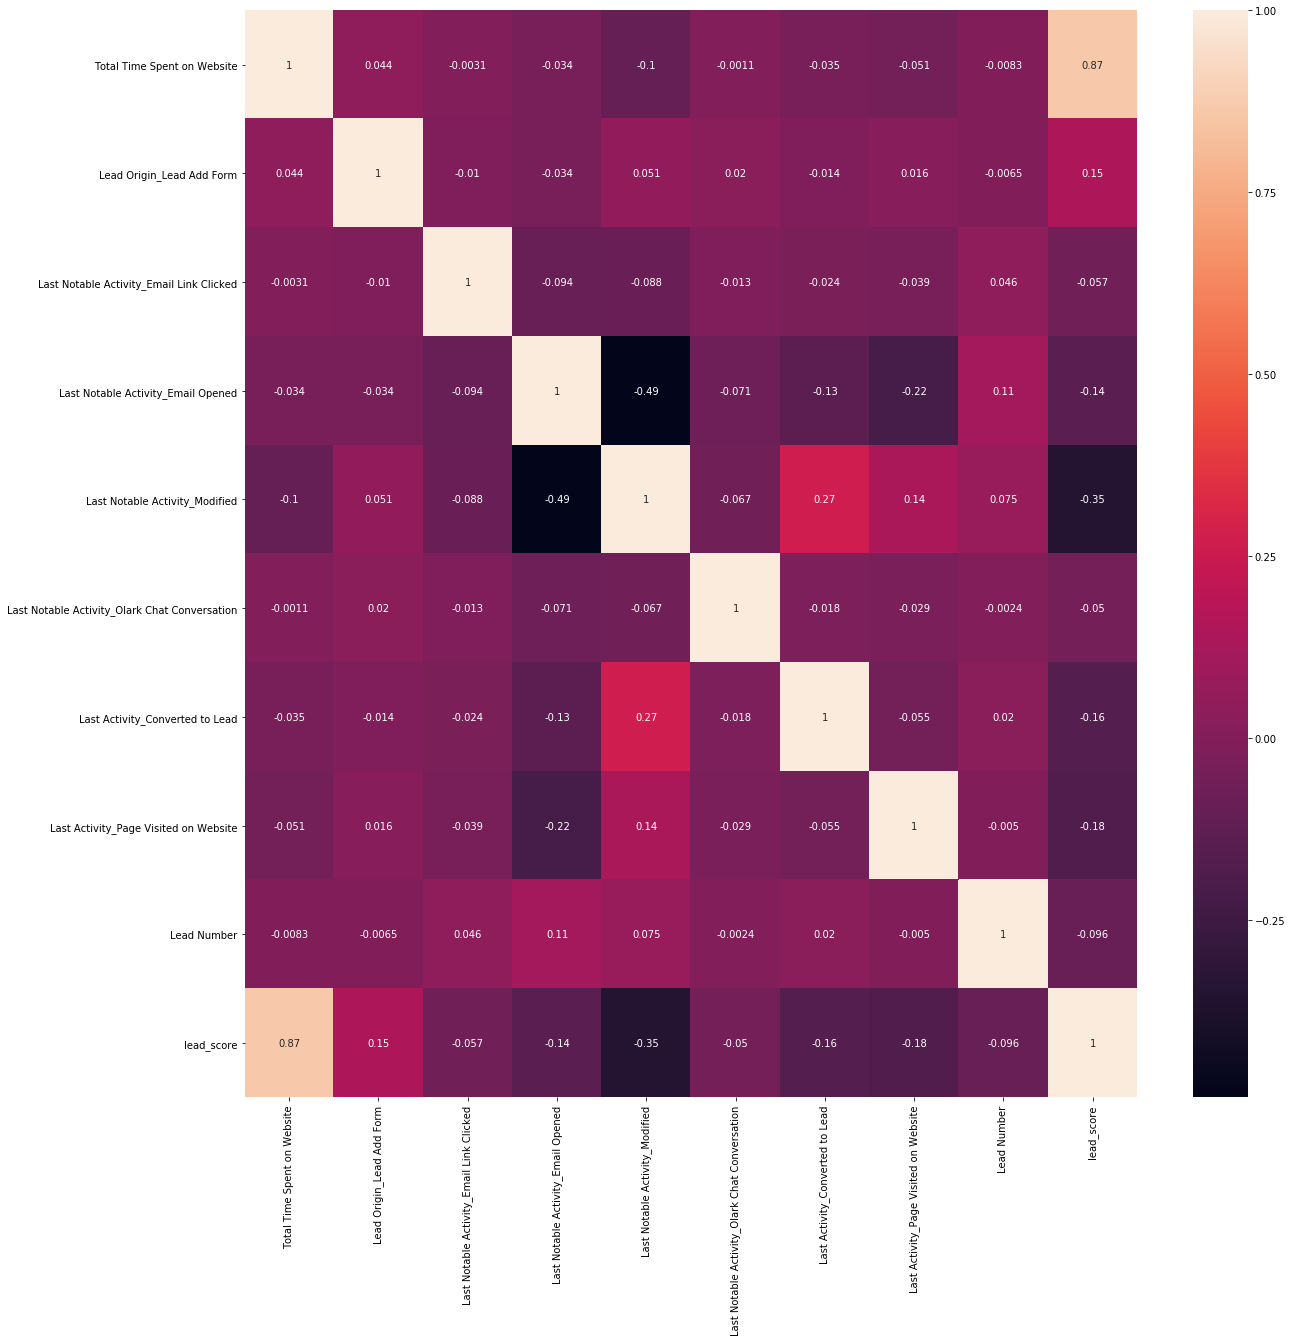

In [520]:
# Let's check for correlation between variables
plt.figure(figsize=(20,20))
sns.heatmap(df3_final.corr(),annot=True)
plt.show()

 #### We can see lead score has strong positive correlation with Total Time Spent on Website & mild negative correlation with Last Notable Activity _ Modified dummy feature 